In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

%matplotlib inline


In [23]:
df=pd.read_csv('/content/salary_prediction_dataset.csv')

In [24]:
df

,YearsExperience,Salary
0,8.116262,41469.816295
1,19.063572,88641.137315
2,14.907885,76440.413727
3,12.374511,64925.484725
4,3.964354,22620.723082
...,...,...
995,2.740059,7100.184410
996,18.428958,89085.944214
997,3.599554,17812.585952
998,19.054510,93126.037490


In [15]:
df.head()


NameError: name 'df' is not defined

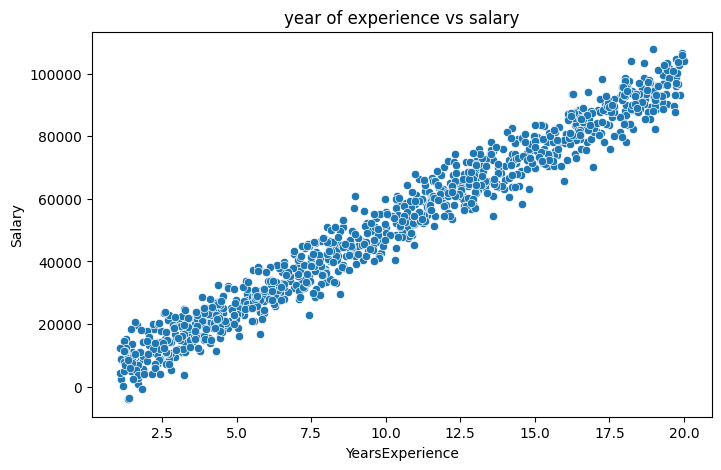

In [29]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['YearsExperience'],y=df['Salary'])
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title("year of experience vs salary")
plt.show()

In [25]:
x=df[['YearsExperience']]
y=df['Salary']
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

X_train.shape,  X_test.shape


((800, 1), (200, 1))

In [26]:
model =LinearRegression()
model.fit(X_train,y_train)
print(f"intercept:{model.intercept_}")
print(f"coefficient:{model.coef_[0]}")

intercept:995.5770464802481
coefficient:4953.709417260945


In [27]:
y_pred=model.predict(X_test)
results=pd.DataFrame({'Actual':y_test.values,'Predicted':y_pred})
results.head()

,Actual,Predicted
0,46144.843128,41798.916309
1,85731.005173,82808.016799
2,55059.748116,49496.929481
3,42143.595304,39465.280850
4,88585.759395,95369.573814


TypeError: seaborn.utils._scatter_legend_artist() got multiple values for keyword argument 'label'

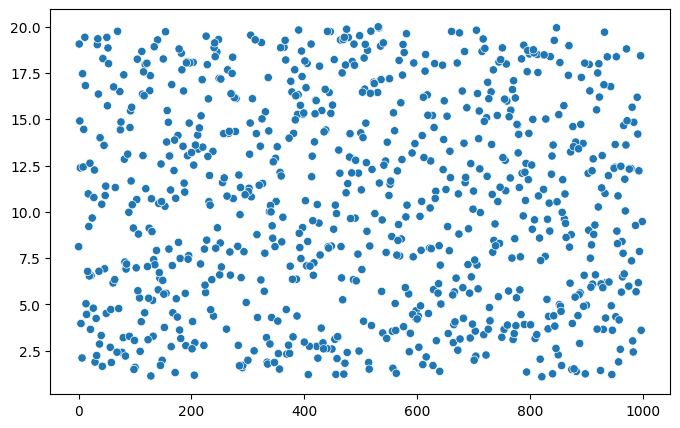

In [28]:
plt.figure(figsize=(8,5))
sns.scatterplot(X_train,color="blue",label="Actual Salary(Training)")
sns.scatterplot(X_test,color="red",label="predicted Salary(Test Data)")
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title("year of experience vs salary")
plt.legend()
plt.show()
plt.plot(X_test,y_pred,color='red')

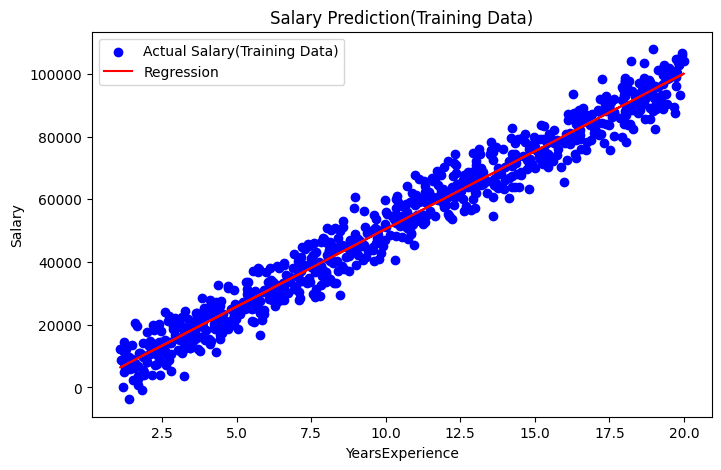

In [30]:
plt.figure(figsize=(8,5))
plt.scatter(X_train,y_train,color='blue',label='Actual Salary(Training Data)')
plt.plot(X_train,model.predict(X_train),color='red',label='Regression')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('Salary Prediction(Training Data)')
plt.legend()
plt.show()

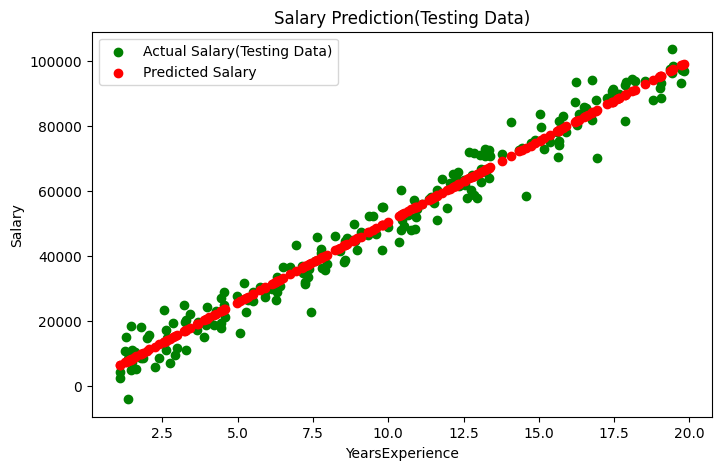

In [31]:
plt.figure(figsize=(8,5))
plt.scatter(X_test,y_test,color='green',label='Actual Salary(Testing Data)')
plt.scatter(X_test,y_pred,color='red',label='Predicted Salary')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('Salary Prediction(Testing Data)')
plt.legend()
plt.show()

In [34]:
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f"Mean Absolute Error(MAE):{mae}")
print(f"Mean Squared Error(MSE):{mse}")
print(f"R2 Score:{r2}")

Mean Absolute Error(MAE):3602.3955438952066
Mean Squared Error(MSE):21434311.66454385
R2 Score:0.9720753738957405


In [35]:
experience = float(input("enter years of experience"))
predicted_salary=model.predict([[experience]])[0]
print(f"Predicted Salary for {experience} years of experience is:{predicted_salary:.2f}")


enter years of experience40
Predicted Salary for 40.0 years of experience is:199143.95


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
